# Evolutionary Computation Project CA2

Using Particle Swarm Optimisation (PSO) to solve the Travelling Salesman Problem (TSP)

Useful Links:

Using Hillclimbing Algorithm to solve TSP: https://github.com/akshay-iyer/Machine-Learning-problems/blob/master/Hill%20Climbing%20for%20TSP.py

Using PSO to solve TSP: https://github.com/rameziophobia/Travelling_Salesman_Optimization/blob/master/pso.py

Comparison Papers: 
A combination of genetic algorithm and particle swarm optimization method for solving traveling salesman problem

Genetic Algorithm for Traveling Salesman Problem with
Modified Cycle Crossover Operator

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time #Import Permitted by Ed Keedwell

## Particle Swarm Optimisation

In [19]:
class Particle:
    def __init__(self):
        #Current Path Particle is Assessing
        self.x = []
        #Cost of Current Path Particle is Asessing
        self.x_cost = np.inf
        #Path with Cheapest Cost that Particle has found
        self.pbest = []
        #Cost of Path with Cheapest that Particle has found
        self.pbest_cost = np.inf

Class where each object represents as a particle. In PSO each particle has a position and fitness. In terms of TSP the particle's position is a possible solution to the TSP instance that the particle is trying to solve. The fitness of the position is the cost of the path, where the distances between adjacent cities in the path are summed together.

In [20]:
class PSO:
    def __init__(self, city_data,swarm_size,max_iterations):
        #x,y position of each city in TSP instance
        self.city_data = city_data
        #Adjacency matrix of TSP instance
        self.adj_mtx = self.create_adj_mtx(city_data)
        #Amount of Cities in TSP instance
        self.city_amount = len(city_data)
        #Amount of Particles to be Initialised
        self.swarm_size = swarm_size
        #List of all Particle Objects
        self.particles = []
        #Path with Least Cost found so far by all particles
        self.gbest = []
        #Least Cost of all paths found so far by all particles
        self.gbest_cost = np.inf
        #Amount of Iterations the algorithm will stop after
        self.max_iterations = max_iterations
        #Store Progression of gbest_cost
        self.fitness_vals = []
    
    def calc_dist(self,pos1, pos2):
        """
        Input: x,y positions of two cities
        Output: Distance between two cities
        Function uses euclidean distance
        to calculate distance between two
        cities. Helps create adjacency matrix.
        """
        city1 = np.array([pos1["X"],pos1["Y"]])
        city2 = np.array([pos2["X"],pos2["Y"]])
        return np.linalg.norm(city1-city2)
    
    def create_adj_mtx(self,city_positions):
        """
        Input: x,y position of each city in
               TSP instance
        Output: Adjacency matrix for TSP instance
        Loops through each city in TSP combination
        and stores distance between them to create
        an adjacency matrix.
        """
        adj_mtx = {}
        city_amount = len(city_positions)
        for i in range(1,city_amount+1):
            distances = {}
            for j in range(1,city_amount+1):
                if i == j:
                    distances[j] = 0
                else:
                    #Calculating Euclidean Distance between Two Cities
                    distances[j] = self.calc_dist(city_positions[i],city_positions[j])
            adj_mtx[i] = distances
        return adj_mtx
    
    def calc_cost(self, path):
        """
        Input: A path that passes through
               every city in TSP instance
        Output: The cost of the inputted path
        Sums distance between adjacent cities
        to calculate total cost of path
        """
        total_cost = 0
        last_city = path[0]
        for i in range(1,len(path)):
            #Summing Distance accessed from adjacent matrix
            total_cost += self.adj_mtx[last_city][path[i]]
            #Storing last city so next distance can be calculated in next iteration
            last_city = path[i]
        #Adding distance between last city and first city to complete cycle
        total_cost += self.adj_mtx[path[-1]][path[0]]
        return total_cost
    
    def initialise_swarm(self):
        """
        No input or output. Method initialises
        required number of particles with random
        TSP paths. Cost of each path calculated.
        """
        for i in range(self.swarm_size):
            new_p = Particle()
            #Array of integers from 1 to integer of amount of cities
            rand_path = np.arange(1,self.city_amount+1)
            #Randomly shuffling array to create a random path
            np.random.shuffle(rand_path)
            #Calculating cost of random path
            rand_path_cost = self.calc_cost(rand_path)
            #Storing Random Path and Cost of Random Path
            new_p.x = rand_path
            new_p.x_cost = rand_path_cost
            #First paths found so by default, this is pbest
            new_p.pbest = rand_path
            new_p.pbest_cost = rand_path_cost
            self.particles.append(new_p)
    
    def calc_g_best(self):
        """
        No input or output. Method calculates the
        best path found so far by all particles by
        calculating the cost of each path of each particle
        and comparing to the current best found so far.
        """
        for i in range(self.swarm_size):
            #Accessing Particle Object
            p = self.particles[i]
            if p.pbest_cost < self.gbest_cost:
                #Better Path found, so best path updated
                self.gbest = p.pbest
                #Cost updated
                self.gbest_cost = p.pbest_cost
        #Adding new gbest value to the progression
        self.fitness_vals.append(self.gbest_cost)
    
    def crossover_paths(self,x1,x2):
        """
        Input: Two TSP Paths
        Output: New TSP Path
        Method implements heuristic crossover algorithm
        on two TSP paths to create a new TSP path.
        Method is used to calculate new paths for particles
        to explore.
        """
        x1 = list(x1)
        x2 = list(x2)
        #Choosing Random City
        v = np.random.choice(np.arange(1,self.city_amount+1))
        #City v moved to the front of both paths
        x1.remove(v)
        x2.remove(v)
        x1.insert(0,v)
        x2.insert(0,v)
        i = j = 1
        #New Path starting with random city v
        x = [v]
        #Iterating through each path
        while i < self.city_amount and j < self.city_amount:
            #Move on as cities from both paths are already in x
            #Avoid Cycle in Route
            if x1[i] in x and x2[j] in x:
                i += 1
                j += 1
            #Appending city from x2 path as city in x1 is already in x
            #Avoid Cycle in Route
            elif x1[i] in x:
                x.append(x2[j])
                j += 1
            #Appending city from x1 path as city in x2 is already in x
            #Avoid Cycle in Route
            elif x2[j] in x:
                x.append(x1[i])
                i += 1
            #Checks have been complete to avoid cycle in apth
            else:
                #Last city in route x is u
                u = x[-1]
                #Distance between u and city in x1
                x1_dist = self.adj_mtx[u][x1[i]]
                #Distance between u and city in x2
                x2_dist = self.adj_mtx[u][x2[j]]
                #City in x1 is closer to u than city in x2
                if x1_dist < x2_dist:
                    x.append(x1[i])
                    i += 1
                #City in x2 is colser to u than city in x1
                else:
                    x.append(x2[j])
                    j += 1
        #Returning new TSP path created
        return np.array(x)
                

    def execute(self):
        """
        Executing whole PSO process
        """
        #Initialising particles
        self.initialise_swarm()
        #Calculating Initial gbest 
        self.calc_g_best()
        iterations = 0
        while iterations != self.max_iterations:
            #Updating pbest for each particle
            for p in self.particles:
                #Hueristic Crossover implemented between pbest and gbest paths to calculate new path
                new_path = self.crossover_paths(p.pbest,self.gbest)
                #Storing new path calcualted
                p.x = new_path
                #Calculating cost of new path
                p.x_cost = self.calc_cost(new_path)
                #Updating particle info if new path calculated is better than current path particle has
                if p.x_cost < p.pbest_cost:
                    p.pbest = p.x
                    p.pbest_cost = p.x_cost
            #Recalculating best path found as all particles have new path
            self.calc_g_best()
            iterations += 1
        #Returning Final gbest path and its cost
        return self.gbest, self.gbest_cost

## Problem Instances

To access the TSP instances so the rest of this notebook will execute in Google Colab the following steps need to be followed.
1) Click Files
2) 

In [21]:
def store_city_data(filename):
    """
    Input: String that is the name
    of a TSP instance file
    Output: Dictionary where x,y position
    of each city in TSP instance
    """
    #Dictionary to store each position of city
    city_positions = {}
    #Opening TSP instance text file
    file = open(filename,"r")
    start_recording = False
    for line in file.readlines():
        line_data = line.strip().split(" ")
        if line_data == ["EOF"]:
            start_recording = False
        elif start_recording == True:
            info = []
            for data in line_data:
                if data != "":
                    info.append(data)
            #Storing position of city in dictionary
            city_positions[int(info[0])] = {"X": float(info[1]), "Y":float(info[2])}
        elif line_data == ["DISPLAY_DATA_SECTION"] or line_data == ["NODE_COORD_SECTION"]:
            start_recording = True
    return city_positions

In [22]:
def graph_instance(city_positions,title):
    """
    Input: 
    city_positions: x,y positions of each city in a
    TSP instance. 
    title: String that will be displayed as title
    of scatter graph displayed at end of function
    No output. Method visually displays x,y position
    of each city
    """
    #X Positions of each City
    x = []
    #Y Positions of each City
    y = []
    plt.figure(figsize=(10,10))
    #Adding Positions of Each City to Lists
    for city in city_positions:
        x.append(city_positions[city]["X"])
        y.append(city_positions[city]["Y"])
    plt.xlim(0, max(x)+10)
    plt.ylim(0, max(y)+10)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    #Plotting Point for each City
    plt.scatter(x,y)
    #Assigning city number as label of each point
    for i in range(len(x)):
        plt.text(x[i], y[i], i+1, va='bottom', ha='center')
    plt.show()

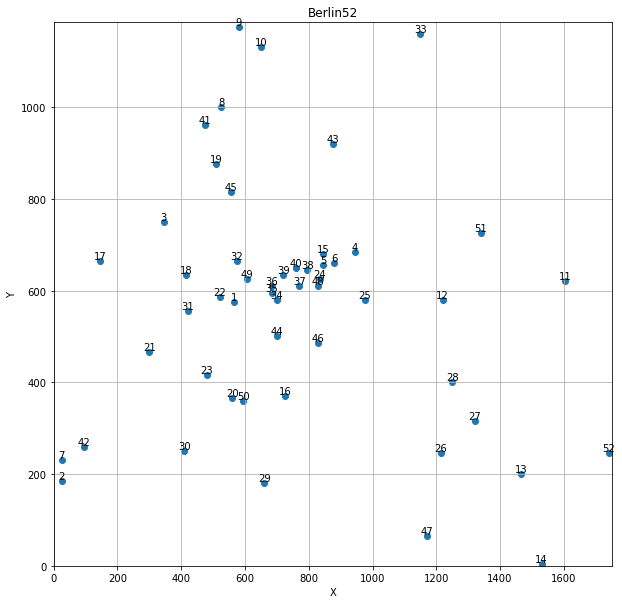

In [23]:
#Visualisation of Berlin52
berlin_positions = store_city_data("berlin52.txt")
graph_instance(berlin_positions,"Berlin52")

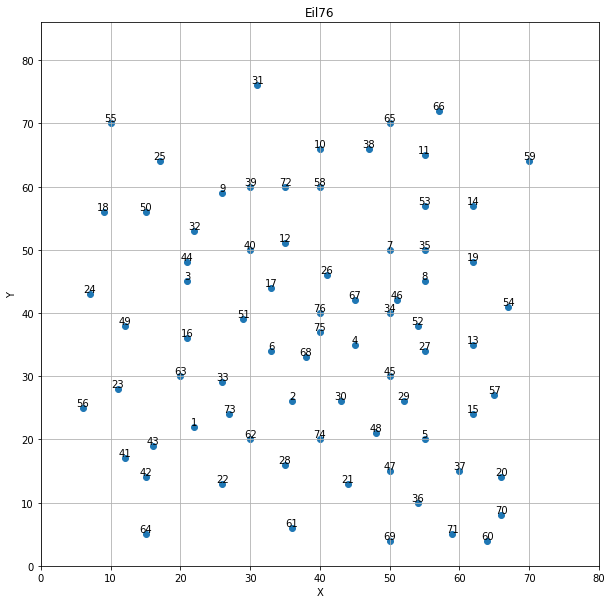

In [24]:
#Visualisation of Eil76
eil_positions = store_city_data("eil76.txt")
graph_instance(eil_positions,"Eil76")

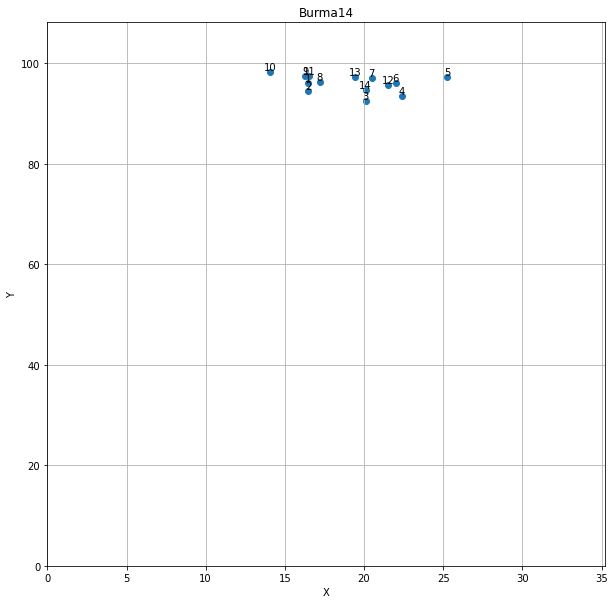

In [25]:
#Visualisation of Burma14
burma_positions = store_city_data("burma14.txt")
graph_instance(burma_positions,"Burma14")

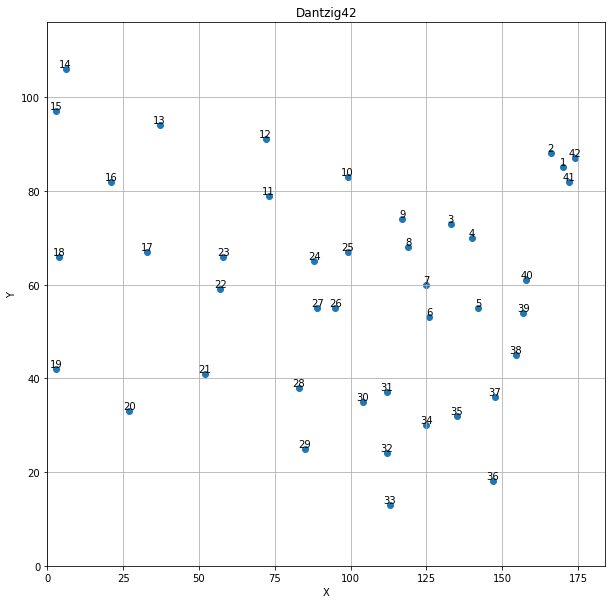

In [26]:
#Visualisation of Dantzig42
dantzig_positions = store_city_data("dantzig42.txt")
graph_instance(dantzig_positions,"Dantzig42")

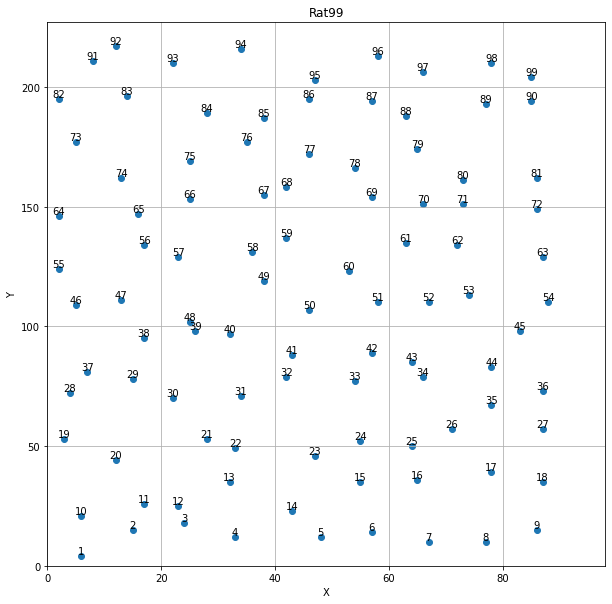

In [27]:
#Visualisation of Rat99
rat_positions = store_city_data("rat99.txt")
graph_instance(rat_positions,"Rat99")

In [28]:
#List consisting of name of each TSP instance
instance_names = ["berlin52","eil76","burma14","dantzig42","rat99"]
#2D Dictionary consting information of each TSP instance
#For each TSP instance, a dictionary consists of the x,y position of each of its cities, amount of city instance and cost of
#optimal path
instance_data = {
    "berlin52": {"positions":berlin_positions,"n_cities":52, "opt_sol":7542},
    "eil76":{"positions":eil_positions,"n_cities":76, "opt_sol":538},
    "burma14":{"positions":burma_positions,"n_cities":14, "opt_sol":30},
    "dantzig42":{"positions":dantzig_positions,"n_cities":42, "opt_sol":699},
    "rat99":{"positions":rat_positions,"n_cities":99, "opt_sol":1211}
}

## Parameter Tuning

The main two parameters that can be experimented with, are the amount of particles initialized in the algorithm and amount of iterations to stop the algorithm after.

In [29]:
def update_performance_data(data_dict,key,costs,clock_times,relative_errors):
    """
    Input: 
    data_dict: Requested dictionary of where information should be stored into
    key: Value of paramater that was used to generate info
    costs: Cost of Final Path Outputted from Algorithm in each Iteration
    clock_times: Clock Times of Algorithm in each Iteration
    relative_errors: Relative Errors of Algorithm in Each Iteration
    Storing performance data about an algorithm on a TSP instance after 30 iterations
    in a dictionary corresponding with key in data_dict.
    """
    #Best Cost of all costs of all final paths from all iterations
    data_dict[key]["best_cost"] = min(costs)
    #Mean Average of all final costs from all the iterations
    data_dict[key]["average_cost"] = np.mean(costs)
    #Mean Average of all clock times for all the iterations
    data_dict[key]["average_clock"] = np.mean(clock_times)
    #Mean Average of all relative errors for all the iterations
    data_dict[key]["average_re"] = np.mean(relative_errors)

### Amount of Particles Parameter

In [30]:
#Dictionary storing performance data for each amount of particles used
dantzig_particles_res = {
    100:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    250:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    500:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    750:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    1000:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
}

In [31]:
def amount_experiment(city_data,res_storage):
    """
    Input:
    city_data: positions of x,y of each city in
               TSP instance
    res_storage: Dictionary where information
                 will be stored in
    No output. Method executes the PSO algorithm
    thirty times for each particle amount and
    calculating performance characteristics along
    the way
    """
    city_positions = city_data["positions"]
    #Cost of Optimal Path for TSP Instance
    opt_cost = city_data["opt_sol"]
    #Particle Amounts that will be experimented on
    particle_amounts = [100,250,500,750,1000]
    #Keeping the iteration amount equivalent throughout
    iteration_amount = 100
    for amount in particle_amounts:
        costs = []
        clock_times = []
        relative_errors = []
        #Executing algorithm with each particle amount thirty times
        for i in range(30):
            #Executing PSO
            my_pso = PSO(city_positions, amount, iteration_amount)
            #Time Before Algorithm has executed
            t0 = time.time()
            #Executing the algorithm
            final_path, final_cost = my_pso.execute()
            #Time After Algorithm is executed
            t1 = time.time()
            #Adding the cost of the best path found by the algorithm
            costs.append(final_cost)
            #Calculating the time taken for the algorithm 
            clock_times.append(t1-t0)
            #Calculating relative error
            r_e = (final_cost - opt_cost)/opt_cost
            relative_errors.append(r_e)
        #Storing performance results in a dictionary
        update_performance_data(res_storage,amount,costs,clock_times,relative_errors)

In [32]:
#Executing PSO algorithm 30 times for each particle amount
#TSP Instance used: Dantzig42
amount_experiment(instance_data["dantzig42"],dantzig_particles_res)

In [33]:
#Visualisation of results in Pandas Dataframe
dantzig_particles_frame = pd.DataFrame(dantzig_particles_res)
dantzig_particles_frame

,100,250,500,750,1000
best_cost,767.134581,733.369280,713.146595,701.843692,682.323829
average_cost,824.903503,817.418625,793.034808,795.309092,801.707485
average_clock,0.891517,2.317510,4.391070,6.547773,9.537761
average_re,0.180119,0.169411,0.134528,0.137781,0.146935


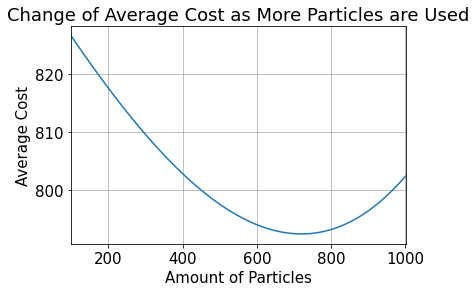

In [34]:
#Visualising effect of the amount of particles on the average cost

#Accessing the different particle amounts used
particle_amounts = list(dantzig_particles_res.keys())
#Storing the average cost of each parameter
average_costs = []
for amount in particle_amounts:
    average_costs.append(dantzig_particles_res[amount]["average_cost"])
#Curve Fitting
z = np.polyfit(particle_amounts, average_costs, 3)
f = np.poly1d(z)
#Creating x points of curve
x_new = np.linspace(particle_amounts[0], particle_amounts[-1], 50)
#Creating y points of curve
y_new = f(x_new)
plt.rcParams.update({'font.size': 15})
#Plotting Curve
plt.plot(x_new, y_new)
plt.xlim([particle_amounts[0]-1, particle_amounts[-1] + 1 ])
plt.xlabel("Amount of Particles")
plt.ylabel("Average Cost")
plt.grid()
plt.title("Change of Average Cost as More Particles are Used")
plt.show()

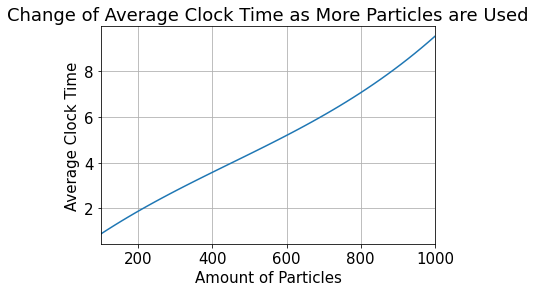

In [35]:
#Visualising effect of the amount of particles on the average clock time

#Accessing the different particle amounts used
particle_amounts = list(dantzig_particles_res.keys())
#Storing the average clock time of each parameter
average_times = []
for amount in particle_amounts:
    average_times.append(dantzig_particles_res[amount]["average_clock"])
#Curve Fitting
z = np.polyfit(particle_amounts, average_times, 3)
f = np.poly1d(z)
#Creating x points of the curve
x_new = np.linspace(particle_amounts[0], particle_amounts[-1], 50)
#Create y points of the curve
y_new = f(x_new)
plt.rcParams.update({'font.size': 15})
#Plotting Curve
plt.plot(x_new, y_new)
plt.xlim([particle_amounts[0]-1, particle_amounts[-1] + 1 ])
plt.xlabel("Amount of Particles")
plt.ylabel("Average Clock Time")
plt.title("Change of Average Clock Time as More Particles are Used")
plt.grid()
plt.show()

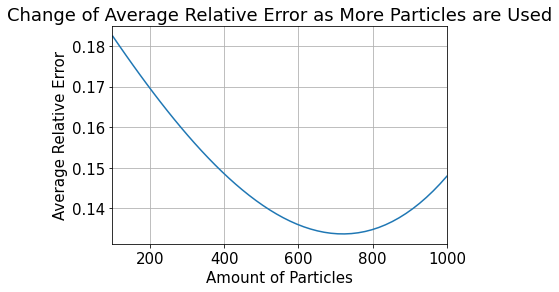

In [36]:
#Visualising effect of the amount of particles on the average relative error

#Accessing the different particle amounts used
particle_amounts = list(dantzig_particles_res.keys())
#Storing the average relative error of each parameter
average_errors = []
for amount in particle_amounts:
    average_errors.append(dantzig_particles_res[amount]["average_re"])
#Curve Fitting
z = np.polyfit(particle_amounts, average_errors, 3)
f = np.poly1d(z)
#Creating x points of curve
x_new = np.linspace(particle_amounts[0], particle_amounts[-1], 50)
#Creating y points of curve
y_new = f(x_new)
plt.rcParams.update({'font.size': 15})
#Plotting curve
plt.plot(x_new, y_new)
plt.xlim([particle_amounts[0]-1, particle_amounts[-1] + 1 ])
plt.xlabel("Amount of Particles")
plt.ylabel("Average Relative Error")
plt.title("Change of Average Relative Error as More Particles are Used")
plt.grid()
plt.show()

### Amount of Iterations Parameter

In [37]:
#Dictionary to store performance for each amount of iterations
dantzig_iterations_res = {
    20:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    50:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    100:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    150:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    200:{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
}

In [38]:
def iteration_experiment(city_data,res_storage):
    """
    Input:
    city_data: positions of x,y of each city in
               TSP instance
    res_storage: Dictionary where information
                 will be stored in
    No output. Method executes the PSO algorithm
    thirty times for each iteration amount and
    calculating performance characteristics along
    the way
    """
    #Accessing x,y position of each city in TSP instance
    city_positions = city_data["positions"]
    #Accessing cost of optimal path for TSP instance
    opt_cost = city_data["opt_sol"]
    #Amount of Iterations that will be experimented with
    iteration_amounts = [20,50,100,150,200]
    #Keeping the amount of particles the same
    particle_amount = 100
    for amount in iteration_amounts:
        costs = []
        clock_times = []
        relative_errors = []
        for i in range(30):
            #Create PSO object
            my_pso = PSO(city_positions, particle_amount, amount)
            #Time before algorithms starts
            t0 = time.time()
            #Executing PSO algorithm
            final_path, final_cost = my_pso.execute()
            #Time after algorithm finishes
            t1 = time.time()
            costs.append(final_cost)
            #Calculating time taken for algorithm to run
            clock_times.append(t1-t0)
            #Calculating relative error using optimal cost
            r_e = (final_cost - opt_cost)/opt_cost
            relative_errors.append(r_e)
        #Calculating and storing performance data
        update_performance_data(res_storage,amount,costs,clock_times,relative_errors)

In [39]:
#Executing method where PSO is executed for each iteration amount 30 times
iteration_experiment(instance_data["dantzig42"],dantzig_iterations_res)

In [40]:
#Visualising results of iteration amounts using Pandas DataFrame
dantzig_particles_frame = pd.DataFrame(dantzig_iterations_res)
dantzig_particles_frame

,20,50,100,150,200
best_cost,854.712836,793.958553,722.287505,729.828088,724.427990
average_cost,1047.716612,883.389914,875.851133,836.140951,861.903776
average_clock,0.176207,0.459673,0.935998,1.276315,1.647762
average_re,0.498879,0.263791,0.253006,0.196196,0.233053


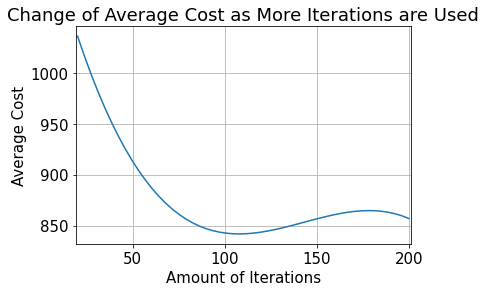

In [41]:
#Visualising effect of the amount of iterations on the average cost

#Acessing Different Iteration Amounts Used
iteration_amounts = list(dantzig_iterations_res.keys())
#Accessing average cost for each iteration amount
average_costs = []
for amount in iteration_amounts:
    average_costs.append(dantzig_iterations_res[amount]["average_cost"])
#Curve fitting
z = np.polyfit(iteration_amounts, average_costs, 3)
f = np.poly1d(z)
#Creating x points for the curve
x_new = np.linspace(iteration_amounts[0], iteration_amounts[-1], 50)
#Creating y points for the curve
y_new = f(x_new)
plt.rcParams.update({'font.size': 15})
#Plot the curve
plt.plot(x_new, y_new)
plt.xlim([iteration_amounts[0]-1, iteration_amounts[-1] + 1 ])
plt.xlabel("Amount of Iterations")
plt.ylabel("Average Cost")
plt.title("Change of Average Cost as More Iterations are Used")
plt.grid()
plt.show()

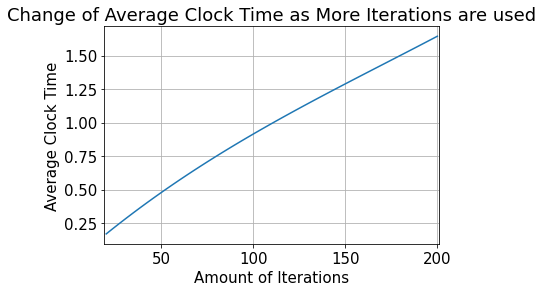

In [42]:
#Visualising effect of the amount of iterations on the average clock time

#Accessing different amounts of iterations used
iteration_amounts = list(dantzig_iterations_res.keys())
#Accessing the average clock time for each iteration amount
average_times = []
for amount in iteration_amounts:
    average_times.append(dantzig_iterations_res[amount]["average_clock"])
#Curve Fitting
z = np.polyfit(iteration_amounts, average_times, 3)
f = np.poly1d(z)
#Creating x points for the curve
x_new = np.linspace(iteration_amounts[0], iteration_amounts[-1], 50)
#Creating y points for the curve
y_new = f(x_new)
plt.rcParams.update({'font.size': 15})
#Plotting the curve
plt.plot(x_new, y_new)
plt.xlim([iteration_amounts[0]-1, iteration_amounts[-1] + 1 ])
plt.xlabel("Amount of Iterations")
plt.ylabel("Average Clock Time")
plt.title("Change of Average Clock Time as More Iterations are used")
plt.grid()
plt.show()

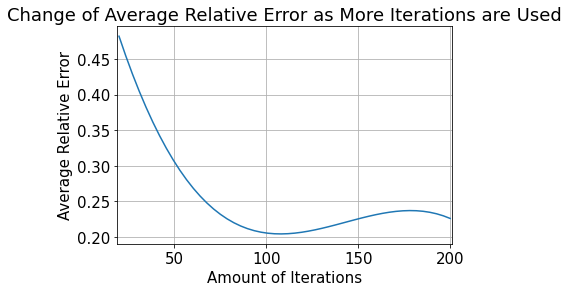

In [43]:
#Visualising effect of the amount of iterations on the average relative error

#Accessing amounts of iteration used
iteration_amounts = list(dantzig_iterations_res.keys())
#Acessing average relative error for each iteration amount
average_errors = []
for amount in iteration_amounts:
    average_errors.append(dantzig_iterations_res[amount]["average_re"])
#Curve fitting
z = np.polyfit(iteration_amounts, average_errors, 3)
f = np.poly1d(z)
#Creating x points for the curve
x_new = np.linspace(iteration_amounts[0], iteration_amounts[-1], 50)
#Creating y points for the curve
y_new = f(x_new)
plt.rcParams.update({'font.size': 15})
#Plotting the curve
plt.plot(x_new, y_new)
plt.xlim([iteration_amounts[0]-1, iteration_amounts[-1] + 1 ])
#plt.plot(iteration_amounts,np.array(particle_amounts)*a+b)
plt.xlabel("Amount of Iterations")
plt.ylabel("Average Relative Error")
plt.title("Change of Average Relative Error as More Iterations are Used")
plt.grid()
plt.show()

## Experimental Comparison with Stochastic Hill-Climber and Random Search

### Stochastic Hill-Climber

In [44]:
class HillClimb:
    def __init__(self, city_data, max_iterations):
        #x,y position of each city
        self.city_data = city_data
        #Adjacency matrix which states distance between each city
        self.adj_mtx = self.create_adj_mtx(city_data)
        #Amount of cities in the TSP instance
        self.city_amount = len(city_data)
        #Current best path found
        self.current_solution = []
        #Cost of current best path found
        self.current_cost = np.inf
        #Array storing all paths in neghbourhood of a path
        self.new_solution_batch = []
        #Amount of Iterations the algorithm will stop after
        self.max_iterations = max_iterations
        #Progression of cost of best solution
        self.fitness_vals = []
    
    def calc_dist(self,pos1, pos2):
        """
        Input:
        pos1: x,y position of a city
        pos2: x,y position of a city
        Output: Euclidean distance 
                between two cities
        """
        city1 = np.array([pos1["X"],pos1["Y"]])
        city2 = np.array([pos2["X"],pos2["Y"]])
        return np.linalg.norm(city1-city2)
        
    def create_adj_mtx(self, city_positions):
        """
        Input: x,y position of each city in
               TSP instance
        Output: Adjacency matrix for TSP instance
        Loops through each city in TSP combination
        and stores distance between them to create
        an adjacency matrix.
        """
        adj_mtx = {}
        city_amount = len(city_positions)
        for i in range(1,city_amount+1):
            distances = {}
            for j in range(1,city_amount+1):
                if i == j:
                    distances[j] = 0
                else:
                    #Calculating Euclidean Distance between two cities
                    distances[j] = self.calc_dist(city_positions[i],city_positions[j])
            adj_mtx[i] = distances
        return adj_mtx
    
    def calc_cost(self, path):
        """
        Input: A path that passes through
               every city in TSP instance
        Output: The cost of the inputted path
        Sums distance between adjacent cities
        to calculate total cost of path
        """
        total_cost = 0
        last_city = path[0]
        for i in range(1,len(path)):
            #Summing Distance accessed from adjacent matrix
            total_cost += self.adj_mtx[last_city][path[i]]
            #Storing last city so next distance can be calculated in next iteration
            last_city = path[i]
        #Adding distance between last city and first city to complete cycle
        total_cost += self.adj_mtx[path[-1]][path[0]]
        return total_cost

    def initialise_problem(self):
        """
        No input or output. Method
        initialises the algorithm
        by creating a random path
        and calculating its cost
        """
        #Generating a random solution
        rand_path = np.arange(1,self.city_amount+1)
        np.random.shuffle(rand_path)
        self.current_solution = rand_path
        #Calculating and storing cost of rand_path
        self.current_cost = self.calc_cost(rand_path)
    
    def generate_new_batch(self):
        """
        No input or output. Method
        generates neighbourhood paths
        of path stored in current_solution
        """
        #Creating new paths where each path has two cities swapped
        for i in range(self.city_amount-1):
            new_path = self.current_solution.copy()
            #Swapping two cities
            new_path[i],new_path[i+1] = self.current_solution[i+1],self.current_solution[i]
            #Adding to the batch
            self.new_solution_batch.append(new_path)
            
    
    def execute(self):
        """
        No input or output. Method executes
        the stochastic hillclimbing process.
        """
        #Initialising the algorithm
        self.initialise_problem()
        iterations = 0
        #Stops after maximum amount of iterations reached
        while iterations != self.max_iterations:
            #Generating neighbourhood to paths to current_solution
            self.generate_new_batch()
            #Find Uphill Moves
            found = False
            uphill_moves = []
            for path in self.new_solution_batch:
                path_cost = self.calc_cost(path)
                #Checking if move is uphill
                if path_cost < self.current_cost:
                    uphill_moves.append(path)
                    found = True
            if found == False:
                break
            #Select Uphill Move Randomly as Next Solution
            selected_index = np.random.choice(np.arange(0,len(uphill_moves)))
            #Storing selected path as new current_solution
            self.current_solution = uphill_moves[selected_index]
            #Calculating cost of current solution
            self.current_cost = self.calc_cost(uphill_moves[selected_index])
            #Storing new cost calculated in fitness progression
            self.fitness_vals.append(self.current_cost)
            iterations += 1
        #Returning best path found and its cost
        return self.current_solution, self.current_cost    

### Random Search

In [45]:
class RandomSearch:
    def __init__(self,city_positions,max_iterations):
        #x,y position of each city
        self.city_positions = city_positions
        #Adjacency matrix of TSP instance
        self.adj_mtx = self.create_adj_mtx(city_positions)
        #Amount of cities in TSP instance
        self.city_amount = len(city_positions)
        #Best path found so far
        self.best_path = []
        #Cost of best path found so far
        self.best_cost = np.inf
        #Iterations after the algorithm will stop after
        self.max_iterations = max_iterations
        #Progression of best cost found
        self.fitness_vals = []
    
    def calc_dist(self,pos1, pos2):
        """
        Input: x,y positions of two cities
        Output: Distance between two cities
        Function uses euclidean distance
        to calculate distance between two
        cities. Helps create adjacency matrix.
        """
        city1 = np.array([pos1["X"],pos1["Y"]])
        city2 = np.array([pos2["X"],pos2["Y"]])
        return np.linalg.norm(city1-city2)
        
    def create_adj_mtx(self, city_positions):
        """
        Input: x,y position of each city in
               TSP instance
        Output: Adjacency matrix for TSP instance
        Loops through each city in TSP combination
        and stores distance between them to create
        an adjacency matrix.
        """
        adj_mtx = {}
        city_amount = len(city_positions)
        for i in range(1,city_amount+1):
            distances = {}
            for j in range(1,city_amount+1):
                if i == j:
                    distances[j] = 0
                else:
                    distances[j] = self.calc_dist(city_positions[i],city_positions[j])
            adj_mtx[i] = distances
        return adj_mtx
    
    def calc_cost(self, path):
        """
        Input: A path that passes through
               every city in TSP instance
        Output: The cost of the inputted path
        Sums distance between adjacent cities
        to calculate total cost of path
        """
        total_cost = 0
        last_city = path[0]
        for i in range(1,len(path)):
            total_cost += self.adj_mtx[last_city][path[i]]
            last_city = path[i]
        total_cost += self.adj_mtx[path[-1]][path[0]]
        return total_cost
        
    
    def mutate_path(self,path):
        """
        Input: path of adjacent cities
        Output: path that has been mutated
        """
        #Random City selected in path
        rand_idx = np.random.randint(1,self.city_amount-1)
        mutated_path = path.copy()
        #Swapping random city with adjacent city to create mutate path
        mutated_path[rand_idx],mutated_path[rand_idx+1] = path[rand_idx+1],path[rand_idx]
        #Return mutated path
        return mutated_path
    
    def execute(self):
        """
        No input or output. Method
        executes the random search
        algorithm on a TSP instance.
        """
        #Generating Starting Path
        rand_path = np.arange(1,self.city_amount+1)
        np.random.shuffle(rand_path)
        self.best_path = rand_path
        self.best_cost = self.calc_cost(rand_path)
        iterations = 0
        while iterations != self.max_iterations:
            #Generating mutated path
            new_path = self.mutate_path(self.best_path)
            #Calcualting cost of mutated path
            new_cost = self.calc_cost(new_path)
            if new_cost < self.best_cost:
                self.best_path = new_path
                self.best_cost = new_cost
            #Storing new calculated best cost
            self.fitness_vals.append(self.best_cost)
            iterations += 1
        #Returning best path found and its cost
        return self.best_path, self.best_cost

### Experimental Comparison 

Experiment Plan:
On every instance execute each algorithm five times
After this, output the following:
    Best Solution Produced
    Average Solution Produced
    Average Wall Clock Time Produced
    Average Relative Error

In [46]:
def update_performance_data(data_dict,key,costs,clock_times,relative_errors):
    """
    Input:
    data_dict: Dictionary where the performance results are stored
    key: Algorithm that was implemented
    """
    #Best cost of best path of all iterations
    data_dict[key]["best_cost"] = min(costs)
    #Average cost of best path of all iterations
    data_dict[key]["average_cost"] = np.mean(costs)
    #Average clock time of all iterations
    data_dict[key]["average_clock"] = np.mean(clock_times)
    #Average relative error of all iterations
    data_dict[key]["average_re"] = np.mean(relative_errors)

In [47]:
def test_algorithm(alg_instance,opt_cost,res_storage,key):
    """
    Input:
    alg_instance: Object of algorithm class
    opt_cost: Optimal Cost of TPS instance being tested on
    res_storage: Dictionary where performance results will be stored in
    key:Algorithm that is being implemented
    Algorithm is implemented thirty times on TSP instance and performance
    data is calcualted and stored.
    """
    costs = []
    clock_times = []
    relative_errors = []
    #Exeucting the algorithm thirty times on TSP instance
    for i in range(30):
        #Time before algorithm is executed
        t0 = time.time()
        #Executing the algorithm
        final_path,final_cost = alg_instance.execute()
        #Time after algorithm is executed
        t1 = time.time()
        costs.append(final_cost)
        #Calculating time taken for algorithm to be executed
        clock_times.append(t1-t0)
        #Calculating average realtive error
        r_e = (final_cost-opt_cost)/opt_cost
        relative_errors.append(r_e)
    #Storing performance results of algorithm on TSP instance
    update_performance_data(res_storage,key,costs,clock_times,relative_errors)

In [48]:
def test_instance(city_data,res_storage):
    """
    Input:
    city_data: Information about the TSP
               instance
    res_storage: Dictionary where performance
                 data will be stored
    Method implements each algorithm on a TSP instance
    thirty times.
    """
    #x,y position of each city in TSP instance
    city_positions = city_data["positions"]
    #Amount of Iterations after algorithms will stop
    max_iterations = 100
    #Cost of optimal path of TSP instance
    opt_cost = city_data["opt_sol"]
    #Creating random search object
    random_search = RandomSearch(city_positions,max_iterations)
    #Executing random search 30 times on TSP instance
    test_algorithm(random_search,opt_cost,res_storage,"random_search")
    #Create hillclimb object
    hill_climb = HillClimb(city_positions,max_iterations)
    #Executing hillclimb algorithm 30 times on TSP instance
    test_algorithm(hill_climb,opt_cost,res_storage,"hill_climb")
    #Amoutn of particles initialised in PSO
    particle_amount = 100
    #Creating PSO object
    pso = PSO(city_positions,particle_amount,max_iterations)
    #Exeucting pso algorithm 30 times on TSP instance
    test_algorithm(pso,opt_cost,res_storage,"particle_swarm")

In [49]:
#Storing performance data of each algorithm on berlin52 instance
berlin_alg_res = {
    "random_search":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "hill_climb":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "particle_swarm":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0}
}

#Storing performance data of each algorithm on eil76 instance
eil_alg_res = {
    "random_search":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "hill_climb":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "particle_swarm":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0}
}

#Storing performance data of each algorithm on burma14 instance
burma_alg_res = {
    "random_search":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "hill_climb":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "particle_swarm":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0}
}

#Storing performance data of each algorithm on dantzig42 instance
dantzig_alg_res = {
    "random_search":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "hill_climb":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "particle_swarm":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0}
}

#Storing performance data of each algorithm on rat99 instance
rat_alg_res = {
    "random_search":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "hill_climb":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0},
    "particle_swarm":{"best_cost":0,"average_cost":0,"average_clock":0,"average_re":0}
}

In [50]:
#Executing each algorithm 30 times on each instance
test_instance(instance_data["berlin52"],berlin_alg_res)
test_instance(instance_data["eil76"],eil_alg_res)
test_instance(instance_data["burma14"],burma_alg_res)
test_instance(instance_data["dantzig42"],dantzig_alg_res)
test_instance(instance_data["rat99"],rat_alg_res)

In [51]:
#Visualsing results for berlin52
berlin_alg_frame = pd.DataFrame(berlin_alg_res)
berlin_alg_frame

,random_search,hill_climb,particle_swarm
best_cost,22753.483648,21865.847580,10443.320249
average_cost,25280.592553,23079.143991,10443.320249
average_clock,0.003371,2.368834,15.014075
average_re,2.351975,2.060083,0.384688


In [52]:
#Visualising results for eil76
eil_alg_frame = pd.DataFrame(eil_alg_res)
eil_alg_frame

,random_search,hill_climb,particle_swarm
best_cost,1974.398999,1909.669343,605.646359
average_cost,2124.171409,1940.082295,618.709853
average_clock,0.003907,6.723639,24.829975
average_re,2.948274,2.606101,0.150018


In [53]:
#Visualising results for burma14
burma_alg_frame = pd.DataFrame(burma_alg_res)
burma_alg_frame

,random_search,hill_climb,particle_swarm
best_cost,31.566962,35.461317,30.878504
average_cost,50.599279,42.573056,30.878504
average_clock,0.001504,0.051906,5.554876
average_re,0.686643,0.419102,0.029283


In [54]:
#Visualising results for dantzig42
dantzig_alg_frame = pd.DataFrame(dantzig_alg_res)
dantzig_alg_frame

,random_search,hill_climb,particle_swarm
best_cost,2138.658330,2117.594065,972.854657
average_cost,2376.904872,2148.601923,972.854657
average_clock,0.002517,1.844511,12.998923
average_re,2.400436,2.073822,0.391781


In [55]:
#Visualising results for rat99
rat_alg_frame = pd.DataFrame(rat_alg_res)
rat_alg_frame

,random_search,hill_climb,particle_swarm
best_cost,6203.080041,5619.673190,1595.320100
average_cost,6925.567086,5846.757381,1612.457529
average_clock,0.005369,15.630572,40.784524
average_re,4.718883,3.828041,0.331509


In [56]:
#Storing results of each instance together in one array
alg_results = [berlin_alg_frame,eil_alg_frame,burma_alg_frame,dantzig_alg_frame,rat_alg_frame]

## Analysis of Results

In [57]:
def n_city_analysis(stat,title_string,ylabel_string):
    """
    Input:
    stat: Performance Metric method is basing graph on e.g.average clock time
    title_string: String that will be the title of the graph
    ylabel_string: String that will be the label of the y axis
    Method shows fluctuation of performance matric 'stat' as
    the amount of city progresses
    """
    random_vals = {}
    hillclimb_vals = {}
    pso_vals = {}
    for i in range(len(instance_names)):
        #Accessing amount of cities in TSP instance
        city_num = instance_data[instance_names[i]]["n_cities"]
        #Performance metric result for random search on TSP instance
        city_val = alg_results[i]["random_search"][stat]
        random_vals[city_num] = city_val
        #Performance metric result for stochastic hillcimb on TSP instance
        city_val = alg_results[i]["hill_climb"][stat]
        hillclimb_vals[city_num] = city_val
        #Performance metric result for pso on TSP instance
        city_val = alg_results[i]["particle_swarm"][stat]
        pso_vals[city_num] = city_val
    #Performance metric scores of random search
    random_vals = sorted(random_vals.items())
    #Performance metric scores of stochastic hillclimb
    hillclimb_vals = sorted(hillclimb_vals.items())
    plt.rcParams.update({'font.size': 18})
    #Performance metric scores of PSO
    pso_vals = sorted(pso_vals.items())
    x = list(zip(*random_vals))[0]
    y = list(zip(*random_vals))[1]
    #Plotting Random Search Performance Metric Progression
    plt.plot(x,y,label="Random Search")
    x = list(zip(*hillclimb_vals))[0]
    y = list(zip(*hillclimb_vals))[1]
    #Plotting Stochastic Hillclimb Metric Progression
    plt.plot(x,y,label="Stochastic Hillclimb")
    x = list(zip(*pso_vals))[0]
    y = list(zip(*pso_vals))[1]
    #Plotting PSO Metric Progression
    plt.plot(x,y,label="PSO")
    plt.xlabel("n cities")
    plt.ylabel(ylabel_string)
    plt.title(title_string)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

### Summarise Algorithm Results 

In [58]:
#Gathering results about each algorithm into one dictionary

random_results = {}
hillclimb_results = {}
pso_results = {}
for i in range(len(instance_names)):
    #Accessing all random search results
    random_results[instance_names[i]] = alg_results[i]["random_search"]
    random_results[instance_names[i]]["best_known"] = instance_data[instance_names[i]]["opt_sol"]
    #Accessing all hillclimbing results
    hillclimb_results[instance_names[i]] = alg_results[i]["hill_climb"]
    hillclimb_results[instance_names[i]]["best_known"] = instance_data[instance_names[i]]["opt_sol"]
    #Accessing all PSO results
    pso_results[instance_names[i]] = alg_results[i]["particle_swarm"]
    pso_results[instance_names[i]]["best_known"] = instance_data[instance_names[i]]["opt_sol"]

In [59]:
#Visualsing Random Search Results 
#Figure 10 in Article
pd.DataFrame(random_results).round(1).transpose().rename(
    columns={"best_cost":"Best Cost",
             "average_cost":"Average Cost",
             "average_clock":"Average Clock Time",
             "average_re":"Average Relative Error",
             "best_known":"Best Known Cost"})

,Best Cost,Average Cost,Average Clock Time,Average Relative Error,Best Known Cost
berlin52,22753.5,25280.6,0.0,2.4,7542.0
eil76,1974.4,2124.2,0.0,2.9,538.0
burma14,31.6,50.6,0.0,0.7,30.0
dantzig42,2138.7,2376.9,0.0,2.4,699.0
rat99,6203.1,6925.6,0.0,4.7,1211.0


In [60]:
#Visualsing Hillclimb Results
#Figure 11 in Article
pd.DataFrame(hillclimb_results).round(1).transpose().rename(
    columns={"best_cost":"Best Cost",
             "average_cost":"Average Cost",
             "average_clock":"Average Clock Time",
             "average_re":"Average Relative Error",
             "best_known":"Best Known Cost"})

,Best Cost,Average Cost,Average Clock Time,Average Relative Error,Best Known Cost
berlin52,21865.8,23079.1,2.4,2.1,7542.0
eil76,1909.7,1940.1,6.7,2.6,538.0
burma14,35.5,42.6,0.1,0.4,30.0
dantzig42,2117.6,2148.6,1.8,2.1,699.0
rat99,5619.7,5846.8,15.6,3.8,1211.0


In [61]:
#Visualising PSO Results
#Figure 12 in Article
pd.DataFrame(pso_results).round(1).transpose().rename(
    columns={"best_cost":"Best Cost",
             "average_cost":"Average Cost",
             "average_clock":"Average Clock Time",
             "average_re":"Average Relative Error",
             "best_known":"Best Known Cost"})

,Best Cost,Average Cost,Average Clock Time,Average Relative Error,Best Known Cost
berlin52,10443.3,10443.3,15.0,0.4,7542.0
eil76,605.6,618.7,24.8,0.2,538.0
burma14,30.9,30.9,5.6,0.0,30.0
dantzig42,972.9,972.9,13.0,0.4,699.0
rat99,1595.3,1612.5,40.8,0.3,1211.0


### Comparison of Clock Times

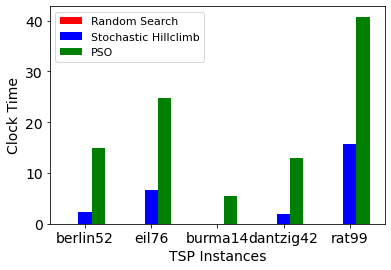

In [62]:
#Visualsing average clock time of each algorithm on each TSP instance
#Figure 14 on Article

#Accessing names of TSP instances
instances = instance_data.keys()
x = np.arange(len(instances))
#Accessing clock times for each algorithm
random_times = []
hill_times = []
particle_times = []
for alg_frame in alg_results:
    random_times.append(alg_frame["random_search"]["average_clock"])
    hill_times.append(alg_frame["hill_climb"]["average_clock"])
    particle_times.append(alg_frame["particle_swarm"]["average_clock"])
width=0.2
plt.rcParams.update({'font.size': 14})
#Plotting Bar for Each Clock Time
plt.bar(x-0.2,random_times,width,color="red")
plt.bar(x,hill_times,width,color="blue")
plt.bar(x+0.2,particle_times,width,color="green")

plt.xticks(x,instances)
plt.xlabel("TSP Instances")
plt.ylabel("Clock Time")
plt.legend(["Random Search", "Stochastic Hillclimb", "PSO"],fontsize=11)
plt.show()

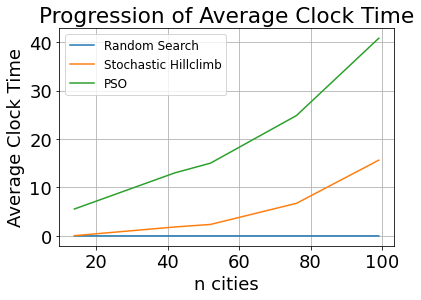

In [63]:
#Visualsing how average clock time progresses as number of cities increase for each algorithm
#Figure 15 on Article
n_city_analysis("average_clock","Progression of Average Clock Time","Average Clock Time")

### Comparison of Relative Errors

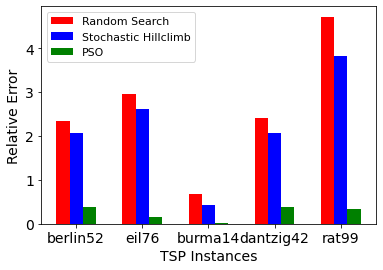

In [64]:
#Visualsing average relative error of each algorithm on each TSP instance

#Accessing names of TSP instances
instances = instance_data.keys()
x = np.arange(len(instances))
#Acessing relative errors for eahc algorithm
random_errors = []
hill_errors = []
particle_errors = []
for alg_frame in alg_results:
    random_errors.append(alg_frame["random_search"]["average_re"])
    hill_errors.append(alg_frame["hill_climb"]["average_re"])
    particle_errors.append(alg_frame["particle_swarm"]["average_re"])
width=0.2
plt.rcParams.update({'font.size': 14})
#Plotting Bar for each relative error
plt.bar(x-0.2,random_errors,width,color="red")
plt.bar(x,hill_errors,width,color="blue")
plt.bar(x+0.2,particle_errors,width,color="green")
plt.xticks(x,instances)
plt.xlabel("TSP Instances")
plt.ylabel("Relative Error")
plt.legend(["Random Search", "Stochastic Hillclimb", "PSO"],fontsize=11)
plt.show()

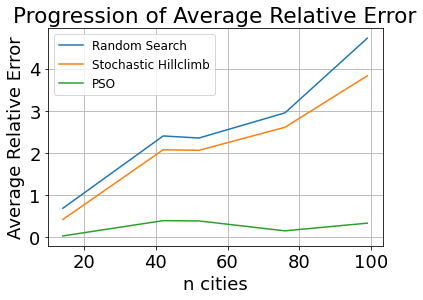

In [65]:
#Visualsing how relative error progresses when the number of cities increases for each algorithm
#Figure 16 on Article
n_city_analysis("average_re","Progression of Average Relative Error","Average Relative Error")

### Comparison of Average Cost

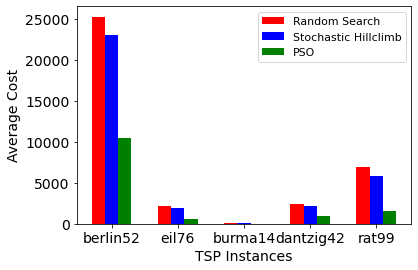

In [66]:
#Visualsing average cost of each algorithm on each TSP instance
#Figure 13 on Article

#Accessing names of TSP instances
instances = instance_data.keys()
x = np.arange(len(instances))
#Acessing average costs of each algorithm
random_errors = []
hill_errors = []
particle_errors = []
for alg_frame in alg_results:
    random_errors.append(alg_frame["random_search"]["average_cost"])
    hill_errors.append(alg_frame["hill_climb"]["average_cost"])
    particle_errors.append(alg_frame["particle_swarm"]["average_cost"])
width=0.2
plt.rcParams.update({'font.size': 14})
#Plotting bar for each average cost
plt.bar(x-0.2,random_errors,width,color="red")
plt.bar(x,hill_errors,width,color="blue")
plt.bar(x+0.2,particle_errors,width,color="green")
plt.xticks(x,instances)
plt.xlabel("TSP Instances")
plt.ylabel("Average Cost")
plt.legend(["Random Search", "Stochastic Hillclimb", "PSO"],fontsize=11)
plt.show()

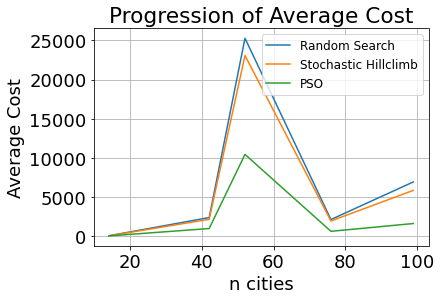

In [67]:
#Analysing progression of average cost whilst amount of cities increases for each algorithm
n_city_analysis("average_cost","Progression of Average Cost","Average Cost")

### Fitness Curves

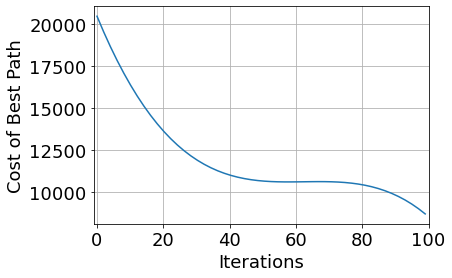

In [68]:
#Drawing Fitness Curve for a single runthrough of PSO

#Paramter values decided in parameter tuning section
max_iterations = 100
x = np.arange(0,max_iterations)
#Generating x points
x_new = np.linspace(x[0], x[-1], 50)
particle_amount = 100

#Creating PSO instance
pso = PSO(instance_data["berlin52"]["positions"],particle_amount,max_iterations)
#Executing PSO algorithm
final_path,final_cost = pso.execute()
pso.fitness_vals.pop(-1)
#Accessing progression of gbest variable
pso_vals = pso.fitness_vals
#Curve Fitting
z = np.polyfit(x, pso_vals, 3)
f = np.poly1d(z)
#Generating y points of the curve
pso_new = f(x_new)
plt.plot(x_new, pso_new)


plt.xlim([x[0]-1, x[-1] + 1 ])
plt.xlabel("Iterations")
plt.ylabel("Cost of Best Path")
plt.title("Fitness Curve of PSO")
plt.grid()
plt.show()

### Path Illustrations 

In [69]:
from matplotlib.pyplot import figure
def draw_path(path,city_positions,final_cost):
    """
    Input:
    path: TSP path that needs to be drawn
    city_positions: x,y position of each city
    final_cost: Cost of path being drawn
    Method takes a path and plots a point for
    each city and draws edges between cities
    according to path
    """
    last_city = path[0]
    figure(figsize=(5,5))
    for i in range(1,len(path)):
        last_city_pos = city_positions[last_city]
        next_city = path[i]
        next_city_pos = city_positions[next_city]
        x_vals = [last_city_pos['X'],next_city_pos['X']]
        y_vals = [last_city_pos['Y'],next_city_pos['Y']]
        #Plotting Line between Cities
        plt.plot(x_vals, y_vals, 'ko', linestyle="--")
        #Labelling Cities
        plt.text(last_city_pos['X']-0.015, last_city_pos['Y']+0.25, last_city)
        plt.text(next_city_pos['X']-0.050, next_city_pos['Y']-0.25, next_city)
        last_city = path[i]
    plt.title(f"Cost:: %d"%final_cost)
    plt.show()

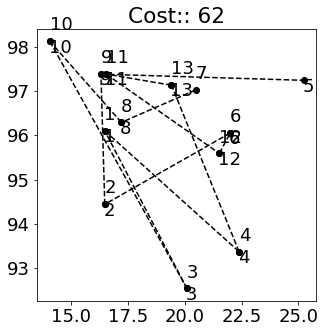

In [70]:
#Accessing x,y positions of each city in burma14
city_positions = instance_data["burma14"]["positions"]
#Creating PSO instance
my_pso = PSO(city_positions,1000,100)
#Creating random path
rand_path = np.arange(1,14)
np.random.shuffle(rand_path)
#Calculating cost of random path
cost_of_path = my_pso.calc_cost(rand_path)
#Visualising path
draw_path(rand_path,city_positions,cost_of_path)

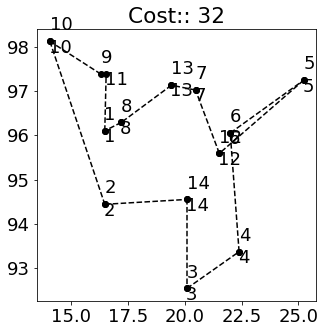

In [71]:
#Accessing x,y positions of each city in burma14
city_positions = instance_data["burma14"]["positions"]
#Creating PSO instance
my_pso = PSO(city_positions,1000,100)
#Executing PSO algorithm to find best path
final_path,final_cost = my_pso.execute()
#Visualising best path found by PSO algorithm
draw_path(final_path,city_positions,final_cost)